# Improving Computer Vision Accuracy using Convolutions

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = tf.nn.relu),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)
test_loss = model.evaluate(test_images, test_labels)

2.1.0-rc1
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4982 - accuracy: 0.8231
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3733 - accuracy: 0.8639
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3342 - accuracy: 0.8777
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3111 - accuracy: 0.8857
Epoch 5/5
10000/10000 [==============================] - 1s 69us/sample - loss: 0.3455 - accuracy: 0.8753


Result from using a simple DNN: training accuracy = 0.89, testing accuracy = 0.88<br>
To improve the result, one simple trick is to use CNN, which adds a filter when processing images. This helps with edge detection. <br>
The code below implements a CNN: add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focused, and possibly more accurate. 

In [11]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(10, activation = 'softmax')
 ])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs = 5)
test_loss = model.evaluate(test_images, test_labels)


2.1.0-rc1
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)     

Training accuracy and testing accuracy increased to 0.93 and 0.91 respectively, which are huge improvements.

In [12]:
model.fit(training_images, training_labels, epochs = 20)
test_loss = model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1690 - accuracy: 0.9351
Epoch 2/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1469 - accuracy: 0.9446
Epoch 3/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1318 - accuracy: 0.9503
Epoch 4/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1124 - accuracy: 0.9576
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1012 - accuracy: 0.9620
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0885 - accuracy: 0.9661
Epoch 7/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0775 - accuracy: 0.9707
Epoch 8/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0697 - accuracy: 0.9736
Epoch 9/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0629 - accuracy: 0.9760
Epoch 10/20
60

The above code increased the epochs to 20, training accuracy increased to 0.99 but testing accuracy stays at 0.91 --- a sign of overfitting<br>
### The above CNN code explained:
Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.<br>
Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 





# Visualizing the Convolutions and Pooling

In [13]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


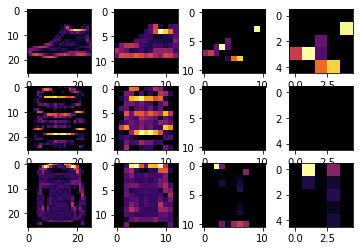

In [14]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)  

### Add callbacks to the CNN

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()
model.fit(training_images, training_labels, epochs=10, callbacks = [callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Train on 60000 samples
Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9903
Reached 95% accuracy so cancelling training!
10000/10000 [==============================] - 1s 70us/sample - loss: 0.6128 - accuracy: 0.9125
0.9125
